# **This code is made by Md Tariqul Islam. You don't have permission to use this.**

# **Step 1: GPU configuration**

In [1]:
%%time
### GPU configuration
! nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found
CPU times: user 6.43 ms, sys: 1.07 ms, total: 7.5 ms
Wall time: 108 ms


# **Step 2: Mount Google Drive**

In [2]:
%%time
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
CPU times: user 2.29 s, sys: 444 ms, total: 2.74 s
Wall time: 32.1 s


# **Step 3: Install required packages**

In [3]:
%%time
!pip install tensorflow_addons
!pip install visualkeras
!pip install -U tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 13.2 MB/s eta 0:00:00
CPU times: user 208 ms, sys: 44.4 ms, total: 252 ms
Wall time: 26.4 s


# **Step 4: Import libraries**

In [4]:
%%time
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import itertools
import seaborn as sns
from PIL import Image
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
import tensorflow_addons as tfa
import visualkeras
import plotly.express as px
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import time
import cv2
import glob
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


CPU times: user 5.26 s, sys: 691 ms, total: 5.95 s
Wall time: 7.94 s


# **Step 5: Define labels and image size**

In [5]:
%%time
# Set the labels and image size
labels = ["Cucumber Mosaic Virus", "Downey Mildew", "Leaf Spot"]
img_size = 32

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


# **Step 6: Function to get data**

In [6]:
%%time

# Function to get data from the specified data directory
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)

        # Loop through images in the current label's directory
        for img in os.listdir(path):
            try:
                # Read and convert the image to RGB format
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]

                # Resize the image to the preferred size
                resized_arr = cv2.resize(img_arr, (img_size, img_size))

                # Append the resized image and its class number to the data list
                data.append([resized_arr, class_num])
            except Exception as e:
                print(f"Error reading or processing image {img} in {label} category: {e}")

    return data

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


# **Step 7: Load data**

In [39]:
%%time
data_dir = get_data("/content/drive/MyDrive/Luffa Aegyptiaca 480")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Luffa Aegyptiaca 480/Downey Mildew'

# **Step 8: Display total number of training images**

In [40]:
%%time
image_names = glob.glob(os.path.join('/content/drive/MyDrive/Luffa Aegyptiaca 480', '*', '*'))
print("Total number of training images: ", len(image_names))

# Make image_names a pandas Series object
image_names = pd.Series(image_names)


Total number of training images:  6533
CPU times: user 23.2 ms, sys: 3.52 ms, total: 26.8 ms
Wall time: 128 ms


# **Step 9: Create a DataFrame with Filename and ClassId**

In [41]:
%%time
# train_df: a dataframe with 2 field: Filename, ClassId
data_df = pd.DataFrame()

# generate Filename field
data_df['Filename'] = image_names.map(lambda img_name: img_name.split("/")[-1])

# generate ClassId field
data_df['ClassId'] = image_names.map(lambda img_name: (img_name.split("/")[-2]))

data_df.head()

CPU times: user 13.2 ms, sys: 821 µs, total: 14 ms
Wall time: 14.1 ms


,Filename,ClassId
0,Downey-Mildew (764).jpg,Downy Mildew
1,Downey-Mildew (257).jpg,Downy Mildew
2,Downey-Mildew (1269).jpg,Downy Mildew
3,Downey-Mildew (254).jpg,Downy Mildew
4,Downey-Mildew (1748).jpg,Downy Mildew


# **Step 10: Display sample images**

CPU times: user 286 ms, sys: 9.68 ms, total: 296 ms
Wall time: 5.26 s


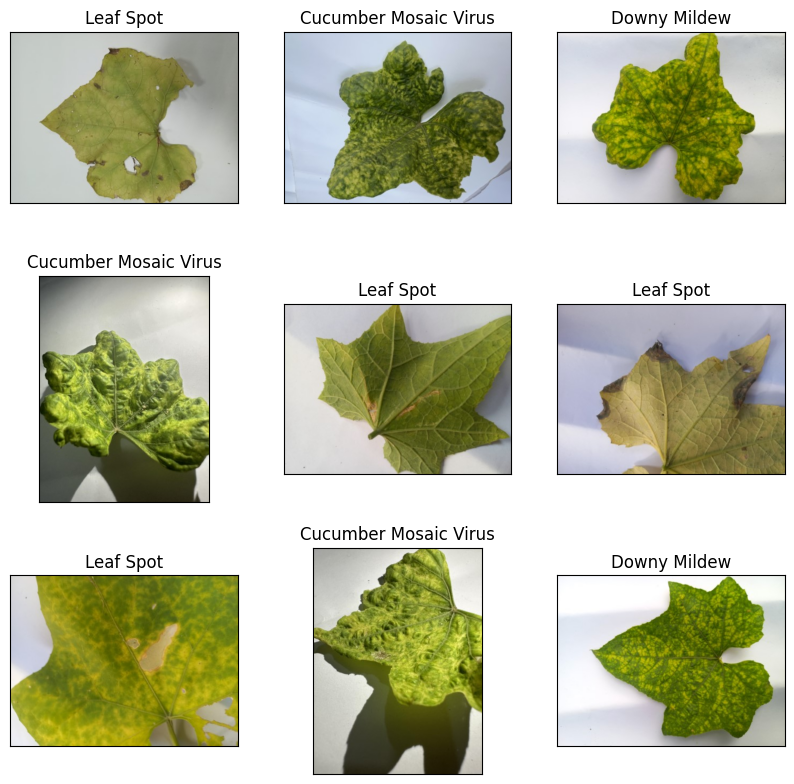

In [42]:
%%time
plot_df = data_df.sample(min(9, len(data_df))).reset_index()

plt.figure(figsize=(10, 10))

for i in range(9):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'ClassId'])
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join('/content/drive/MyDrive/Luffa Aegyptiaca 480',label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])

# **Step 11: Display class distribution**

In [43]:
%%time
class_id_distribution = data_df['ClassId'].value_counts()
class_id_distribution.head(10)

CPU times: user 2.32 ms, sys: 32 µs, total: 2.35 ms
Wall time: 2.36 ms


Leaf Spot                2505
Downy Mildew             2024
Cucumber Mosaic Virus    2004
Name: ClassId, dtype: int64

# **Step 12: Display class distribution graph**

CPU times: user 143 ms, sys: 0 ns, total: 143 ms
Wall time: 158 ms


<BarContainer object of 3 artists>

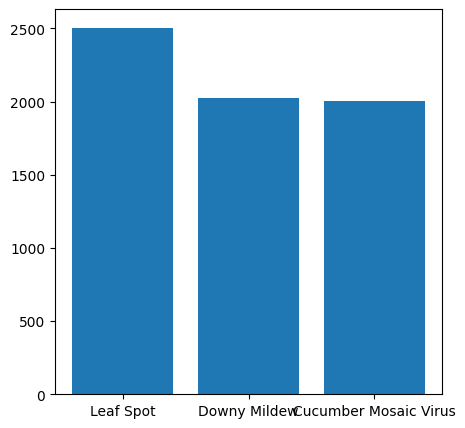

In [44]:
%%time
plt.figure(figsize=(5,5))
plt.xticks(np.arange(43))
plt.bar(class_id_distribution.index, class_id_distribution.values)

In [45]:
%%time
plt.figure(figsize = (5,5))
plt.imshow(data_dir[1][0])
plt.title(labels[data_dir[0][1]])


NameError: name 'data_dir' is not defined

<Figure size 500x500 with 0 Axes>

In [46]:
%%time
X = []
Y = []


for feature, label in data_dir:
  X.append(feature)
  Y.append(label)
X = np.array(X) / 255
X.reshape(-1, img_size, img_size, 1)
Y = np.array(Y)

NameError: name 'data_dir' is not defined

In [47]:
%%time
print(X.shape)

AttributeError: 'list' object has no attribute 'shape'

In [48]:
%%time
# split with a stratified sampling
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.10, stratify=Y, random_state=42)

ValueError: With n_samples=0, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [49]:
%%time
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
    test_size=0.18, random_state= 8) # 0.25 x 0.8 = 0.2

NameError: name 'x_train' is not defined

In [50]:
%%time
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape} - y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


NameError: name 'x_train' is not defined

In [51]:
%%time
num_classes = 3
input_shape = (32, 32, 3)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.54 µs


In [52]:
%%time
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 128
num_epochs = 250
image_size = 32  # We'll resize input images to this size
patch_size = 8  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 3
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 1
mlp_head_units = [2048, 1024]

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 13.4 µs


In [53]:
%%time
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

NameError: name 'x_train' is not defined

In [54]:
%%time
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.54 µs


In [55]:
%%time
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

CPU times: user 63 µs, sys: 0 ns, total: 63 µs
Wall time: 68.4 µs


In [56]:
%%time


plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("float"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("float"))
    plt.axis("off")

NameError: name 'x_train' is not defined

<Figure size 400x400 with 0 Axes>

In [57]:
%%time
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

CPU times: user 38 µs, sys: 5 µs, total: 43 µs
Wall time: 45.8 µs


In [58]:
%%time
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs


In [59]:
%%time
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )
    model.summary()

    checkpoint_filepath = "/content/drive/MyDrive/model/model64_12.h5"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,

        lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                  cooldown= 10,
                                                  patience=10,
                                                  verbose =1,
                                                  min_lr=0.1e-7),


# stop learining as metric on validatopn stop increasing
        early_stopping = tf.keras.callbacks.EarlyStopping(patience=15,
                                                  verbose=1,
                                                  mode = 'auto')
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_data=(x_val, y_val),
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [60]:
%%time
vit_classifier = create_vit_classifier()
vit_history = run_experiment(vit_classifier)

Cause: Unable to locate the source code of <bound method Patches.call of <__main__.Patches object at 0x7e8b38c96ef0>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method Patches.call of <__main__.Patches object at 0x7e8b38c96ef0>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method PatchEncoder.call of <__main__.PatchEncoder object at 0x7e8b4015b130>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method PatchEncoder.call of <__main__.PatchEncoder object at 0x7e8b4015b130>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 data_augmentation (Seq

NameError: name 'x_train' is not defined

NameError: name 'vit_history' is not defined

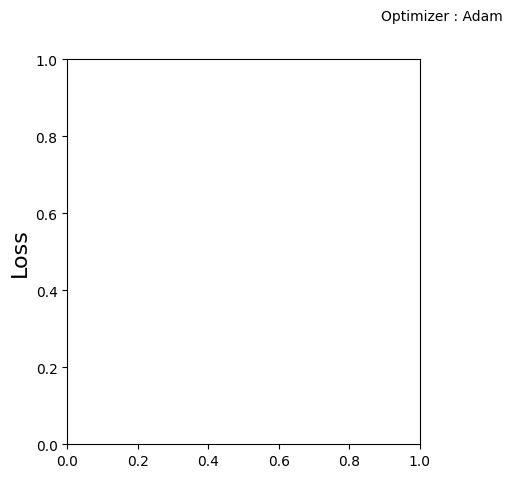

In [61]:
%%time
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(vit_history.history['loss'], label='Training Loss')
plt.plot(vit_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(vit_history.history['accuracy'], label='Training Accuracy')
plt.plot(vit_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [62]:
%%time
vit_predictions = vit_classifier.predict(x_val)
vit_y_pred = [np.argmax(probas) for probas in vit_predictions]

NameError: name 'x_val' is not defined

In [63]:
%%time
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f%' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 15 µs


In [64]:
%%time
# compute confusion matrix
cnf_matrix = confusion_matrix(y_val, vit_y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Cucumber Mosaic Virus", "Downy Mildew", "Leaf Spot"], title='Normalized confusion matrix')
plt.show()

NameError: name 'y_val' is not defined

In [65]:
%%time
print(classification_report(y_val, vit_y_pred, target_names=["Cucumber Mosaic Virus", "Downy Mildew", "Leaf Spot"]))



NameError: name 'y_val' is not defined

In [66]:
%%time
vit_predictions = vit_classifier.predict(x_test)
vit_y_pred = [np.argmax(probas) for probas in vit_predictions]

NameError: name 'x_test' is not defined

In [67]:
%%time
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f%' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 20 µs


In [68]:
%%time
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, vit_y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Cucumber Mosaic Virus", "Downy Mildew", "Leaf Spot"], title='Normalized confusion matrix')
plt.show()

NameError: name 'y_test' is not defined

In [69]:
%%time
print(classification_report(y_test, vit_y_pred, target_names=["Cucumber Mosaic Virus", "Downy Mildew", "Leaf Spot"]))



NameError: name 'y_test' is not defined

In [70]:
# Replace the path below with the actual path to your new image in Google Drive
new_image_path = '/content/drive/MyDrive/Predicting Image/Leaf-Spot (47).jpg'

# Load and preprocess the new image
new_image = cv2.imread(new_image_path)[...,::-1]  # Convert BGR to RGB format
resized_image = cv2.resize(new_image, (img_size, img_size))
input_image = np.expand_dims(resized_image, axis=0) / 255.0  # Normalize

# Use the trained model to make predictions
predictions = vit_classifier.predict(input_image)
predicted_label = labels[np.argmax(predictions)]

# Display the original image along with the predicted label
plt.figure(figsize=(6, 6))
plt.imshow(resized_image)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis("off")
plt.show()

TypeError: 'NoneType' object is not subscriptable